# R for data science: Tidyverse

The **tidyverse** is one of the most popular ecosystems for data science in R. It includes many R packages commonly used in everyday data analysis. The core packages are as follows:

- **ggplot2** for visualization
- **dplyr** for data manipulation
- **tidyr** to tidy your data
- **readr** to read data
- **purrr** for functional programming
- **tibble** for enhanced data frames
- **stringr** for string manipulation
- **forcats** for working with categorical data (factors)



## Loading the tidyverse

The **tidyverse** is a collection of packages. In R, to load a library or package, you simply use the `library()` function. This is similar to using the `import` keyword in Python.

In [1]:
# install.packages("tidyverse")
library("tidyverse")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## The pipe (`%>%`) operator

One of the most powerful tools introduced in the **tidyverse** is the pipe (`%>%`) operator, which enables chaining functions in a clear, readable way—especially useful for data manipulation tasks.

Here’s an example where we first apply a logical filter, then select specific columns, and finally sort the data:

In [2]:
# Example with the iris dataset
iris.df<-read.csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/refs/heads/master/iris.csv")

iris.df.pipe <- # Save the resulting pipeline into this variable
    iris.df %>% # start with the original dataframe
        filter(species == "virginica") %>% # take observations corresponding to virginica
            select(petal_length, petal_width) %>%  # select petal_length and petal_width colums
                arrange(desc(petal_length)) # sort data in descending order based on petal_length

head(iris.df.pipe)

petal_length petal_width
1 6.9          2.3        
2 6.7          2.2        
3 6.7          2.0        
4 6.6          2.1        
5 6.4          2.0        
6 6.3          1.8

## Data cleaning

In [3]:
df.to.clean = data.frame(x = c(2, NA, 1, 1), 
                          y = c(NA, NA, 6, 6)
                         )
df.to.clean

x  y 
1  2 NA
2 NA NA
3  1  6
4  1  6

### `drop_na`: drop missing values

In [4]:
df.to.clean %>% drop_na()

x y
1 1 6
2 1 6

### `replace_na`: replace missing values

In [5]:
df.to.clean %>%replace_na(list(x=0, y=0))

x y
1 2 0
2 0 0
3 1 6
4 1 6

### `distinc`: drop duplicated data

In [6]:
df.to.clean %>% distinct()

x  y 
1  2 NA
2 NA NA
3  1  6

**Remember**: we can concatenate them together.

In [7]:
df.to.clean %>% replace_na(list(x=0, y=0)) %>% distinct()

x y
1 2 0
2 0 0
3 1 6

## Data manipulation

In [8]:
# let's load again our Iris dataframe
iris.df<-read.csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/refs/heads/master/iris.csv")

In [9]:
dim(iris.df)

[1] 150   5

In [10]:
str(iris.df)

'data.frame':	150 obs. of  5 variables:
 $ sepal_length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ sepal_width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ petal_length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ petal_width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ species     : chr  "setosa" "setosa" "setosa" "setosa" ...


### `filter`: Pick observations by their values

This function allows you to subset observations based on specific conditions.

In [11]:
iris.df.setosa<-iris.df %>% filter(species=="setosa")

head(iris.df.setosa)

sepal_length sepal_width petal_length petal_width species
1 5.1          3.5         1.4          0.2         setosa 
2 4.9          3.0         1.4          0.2         setosa 
3 4.7          3.2         1.3          0.2         setosa 
4 4.6          3.1         1.5          0.2         setosa 
5 5.0          3.6         1.4          0.2         setosa 
6 5.4          3.9         1.7          0.4         setosa

In [12]:
# Here filtering based on two columns
iris.df.setosa.2<-iris.df %>% filter(species=="setosa", sepal_width>3)

head(iris.df.setosa.2)

sepal_length sepal_width petal_length petal_width species
1 5.1          3.5         1.4          0.2         setosa 
2 4.7          3.2         1.3          0.2         setosa 
3 4.6          3.1         1.5          0.2         setosa 
4 5.0          3.6         1.4          0.2         setosa 
5 5.4          3.9         1.7          0.4         setosa 
6 4.6          3.4         1.4          0.3         setosa

In [13]:
# Here filtering with two logical conditions in the same column
iris.df.3<-iris.df %>% filter(sepal_width> 2 & sepal_width <= 3)

head(iris.df.3)

sepal_length sepal_width petal_length petal_width species
1 4.9          3.0         1.4          0.2         setosa 
2 4.4          2.9         1.4          0.2         setosa 
3 4.8          3.0         1.4          0.1         setosa 
4 4.3          3.0         1.1          0.1         setosa 
5 5.0          3.0         1.6          0.2         setosa 
6 4.4          3.0         1.3          0.2         setosa

### `arrange`: sort data by value

This function takes a dataframe, and a set of column names (or more complicated expressions) to order by (in ascending order by default). If more than one column name is provided, each additional column is used to break ties in the values of preceding columns.

In [14]:
# This sorts the data based on sepal length first and then sepal_width
iris.df.sorted<-iris.df %>% arrange(sepal_length, sepal_width)
head(iris.df.sorted)

sepal_length sepal_width petal_length petal_width species
1 4.3          3.0         1.1          0.1         setosa 
2 4.4          2.9         1.4          0.2         setosa 
3 4.4          3.0         1.3          0.2         setosa 
4 4.4          3.2         1.3          0.2         setosa 
5 4.5          2.3         1.3          0.3         setosa 
6 4.6          3.1         1.5          0.2         setosa

If we want to reorder in descending order, we can use the function `desc`. This, in contrast to Python's Pandas, can be specified to single columns: 

In [15]:
# This sorts the data based on sepal length first, in descending order, and then sepal_width, in ascending order
iris.df.sorted<-iris.df %>% arrange(desc(sepal_length), sepal_width)
head(iris.df.sorted)

sepal_length sepal_width petal_length petal_width species  
1 7.9          3.8         6.4          2.0         virginica
2 7.7          2.6         6.9          2.3         virginica
3 7.7          2.8         6.7          2.0         virginica
4 7.7          3.0         6.1          2.3         virginica
5 7.7          3.8         6.7          2.2         virginica
6 7.6          3.0         6.6          2.1         virginica

### `select`: select columns

It allows you to pick a subset of variables.

In [16]:
# This selects columns by the given names of the columns. Here we just select sepal_length, sepal_width and species
iris.df.select<-iris.df %>% select(sepal_length, sepal_width, species)

head(iris.df.select)

sepal_length sepal_width species
1 5.1          3.5         setosa 
2 4.9          3.0         setosa 
3 4.7          3.2         setosa 
4 4.6          3.1         setosa 
5 5.0          3.6         setosa 
6 5.4          3.9         setosa

If you want to select consecutive columns, we can use the `:` operator, as in vectors.

In [17]:
# This selects all columns between sepal_length and petal_width (inclusive)
iris.df.select.2<-iris.df %>% select(sepal_length:petal_width)

head(iris.df.select.2)

sepal_length sepal_width petal_length petal_width
1 5.1          3.5         1.4          0.2        
2 4.9          3.0         1.4          0.2        
3 4.7          3.2         1.3          0.2        
4 4.6          3.1         1.5          0.2        
5 5.0          3.6         1.4          0.2        
6 5.4          3.9         1.7          0.4

And you can use a minus (`-`) operator before the name of the columns to filter them out.

In [18]:
# This selects all columns but sepal_length and sepal_width
iris.df.select.3<-iris.df %>% select(-sepal_length, -sepal_width)

head(iris.df.select.3)

petal_length petal_width species
1 1.4          0.2         setosa 
2 1.4          0.2         setosa 
3 1.3          0.2         setosa 
4 1.5          0.2         setosa 
5 1.4          0.2         setosa 
6 1.7          0.4         setosa

And you can also remove consecutive columns by combining both operators:

In [19]:
iris.df.select.4<-iris.df %>% select(-(sepal_length:petal_width))

head(iris.df.select.4)

species
1 setosa 
2 setosa 
3 setosa 
4 setosa 
5 setosa 
6 setosa

### `mutate`: creating columns

This function allows you to add new columns to data frames. It would be mostly similar to `assign` in Python's Pandas

In [20]:
# This creates a new column by multiplying summing sepal_length with sepal_width
iris.df.volume<-iris.df %>% mutate(sepal_volume=sepal_length*sepal_width)
head(iris.df.volume)

sepal_length sepal_width petal_length petal_width species sepal_volume
1 5.1          3.5         1.4          0.2         setosa  17.85       
2 4.9          3.0         1.4          0.2         setosa  14.70       
3 4.7          3.2         1.3          0.2         setosa  15.04       
4 4.6          3.1         1.5          0.2         setosa  14.26       
5 5.0          3.6         1.4          0.2         setosa  18.00       
6 5.4          3.9         1.7          0.4         setosa  21.06

We can always use a preceding created column to define a new column.

In [21]:
# This creates a new column by multiplying multiplying sepal_length with sepal_width, and a second column with the logarithm
iris.df.volume.2<- iris.df %>% mutate(sepal_volume=sepal_length*sepal_width, sepal_volume_log=log(sepal_volume))
head(iris.df.volume.2)

sepal_length sepal_width petal_length petal_width species sepal_volume
1 5.1          3.5         1.4          0.2         setosa  17.85       
2 4.9          3.0         1.4          0.2         setosa  14.70       
3 4.7          3.2         1.3          0.2         setosa  15.04       
4 4.6          3.1         1.5          0.2         setosa  14.26       
5 5.0          3.6         1.4          0.2         setosa  18.00       
6 5.4          3.9         1.7          0.4         setosa  21.06       
  sepal_volume_log
1 2.882004        
2 2.687847        
3 2.710713        
4 2.657458        
5 2.890372        
6 3.047376

In [22]:
# Obviously, this is going to give an error because we are trying to use a sepal_volume before it was created
iris.df.volume.3<-iris.df %>% mutate(sepal_volume_log=log(sepal_volume), sepal_volume=sepal_length*sepal_width)
head(iris.df.volume.3)

ERROR: [1m[33mError[39m in `mutate()`:[22m
[1m[22m[36mℹ[39m In argument: `sepal_volume_log = log(sepal_volume)`.
[1mCaused by error:[22m
[33m![39m objeto 'sepal_volume' no encontrado


### `group_by` and `summarize`: collapse down to a single summary

This would be similar to using `groupby` method in Pandas' dataframes

In [23]:
# This first groups by species and then calculates the average sepal length within each category
iris.df %>% group_by(species) %>% summarize(mean_sepal_length = mean(sepal_length))

species    mean_sepal_length
1 setosa     5.006            
2 versicolor 5.936            
3 virginica  6.588

In [24]:
# You can can have several aggregation methods too
iris.df %>% group_by(species) %>% summarize(mean_sepal_length = mean(sepal_length),
                                            median_sepal_length = median(sepal_length))

species    mean_sepal_length median_sepal_length
1 setosa     5.006             5.0                
2 versicolor 5.936             5.9                
3 virginica  6.588             6.5

If you want to apply the same aggregation method to several columns, you need to use the `across` function:

In [25]:
# This first groups by species and then calculates the average across all columns between sepal_length and petal_width
iris.df %>% group_by(species) %>% summarize(across(sepal_length:petal_width, mean)) 

species    sepal_length sepal_width petal_length petal_width
1 setosa     5.006        3.428       1.462        0.246      
2 versicolor 5.936        2.770       4.260        1.326      
3 virginica  6.588        2.974       5.552        2.026

## `pivot_longer`: reshape data to long format

This would be similart to `pd.melt` in Python's Pandas

In [26]:
iris.df.melt<-iris.df %>% pivot_longer(sepal_length:petal_width)

head(iris.df.melt)

species name         value
1 setosa  sepal_length 5.1  
2 setosa  sepal_width  3.5  
3 setosa  petal_length 1.4  
4 setosa  petal_width  0.2  
5 setosa  sepal_length 4.9  
6 setosa  sepal_width  3.0

## Data visualization

I don't want to finish this introduction to doing data science in R without briefly showing **ggplot2**.

**ggplot2** is for data visualization, and personally, I think it is the best thing in R. It allows you to create magnificient and professional plots in an elegant and versatile way.

It is based on grammar of graphics, a coherent system for describing and building graphs.

To build a ggplot, you need to use the following basic template that can be used for different types of plots:


> `ggplot(data = <DATA>, mapping = aes(<MAPPINGS>)) +  <GEOM_FUNCTION>()`

or 

> `ggplot(data = <DATA>) +  <GEOM_FUNCTION>(mapping = aes(<MAPPINGS>))`


In a nutshell:

- One begins a plot with the function `ggplot`, which creates a coordinate system where you can add layers to. 
- The first argument of `ggplot` is the dataset to use in the graph. 
- The graph can be then completed by adding one or more layers to `ggplot` using a `geom` function.
- Each `geom` function in **ggplot2** takes a mapping argument. This defines how variables in your dataset are mapped to visual properties. The mapping argument is always paired with the function `aes`, and the x and y arguments of `aes()` specify which variables to map to the x- and y-axes.
- **ggplot2** comes with many `geom` functions that each add a different type of layer to a plot

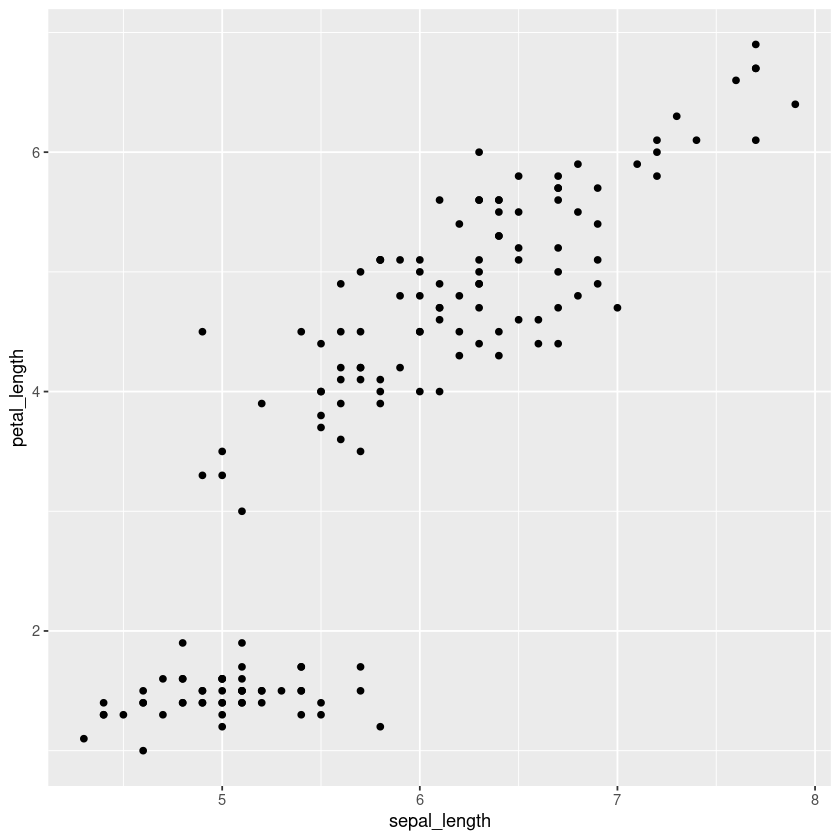

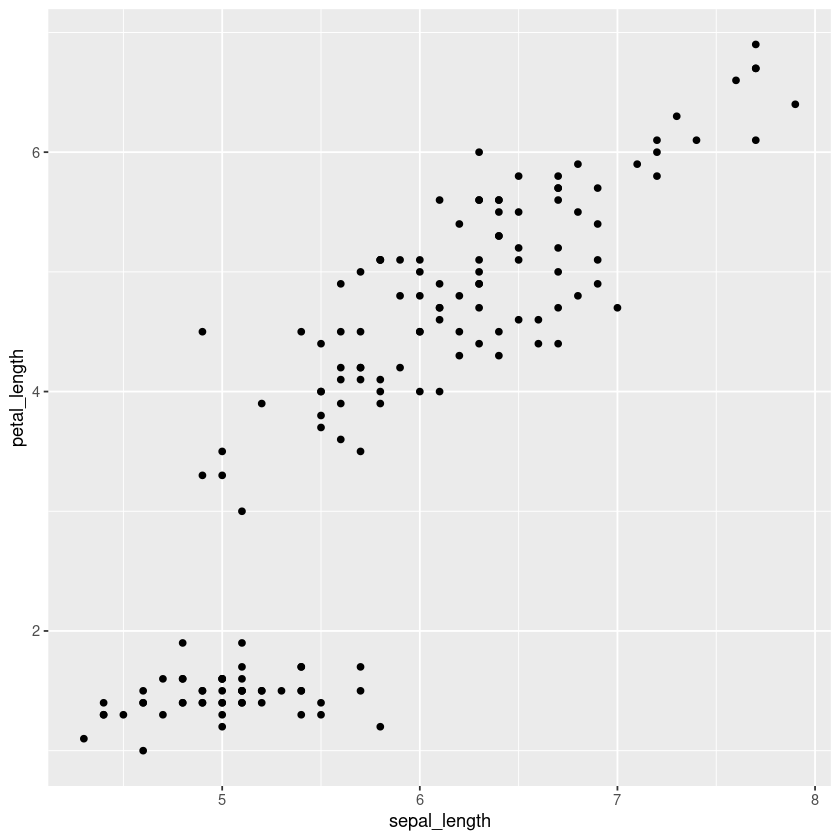

In [27]:
iris.df %>% ggplot(aes(x=sepal_length, y=petal_length)) + geom_point()

# or

iris.df %>% ggplot() + geom_point(aes(x=sepal_length, y=petal_length))

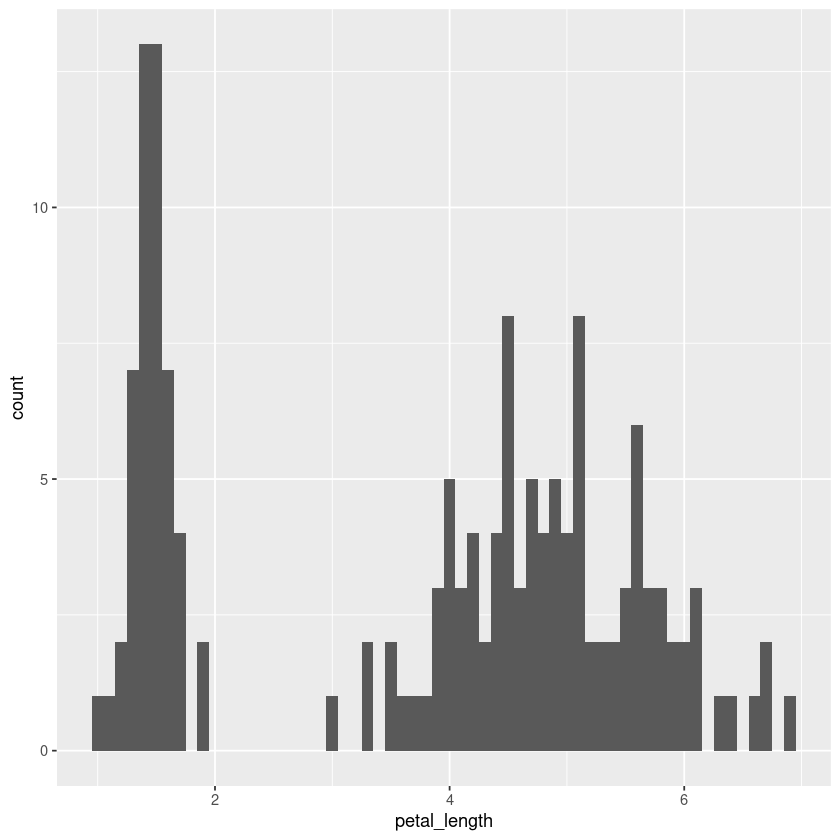

In [28]:
iris.df %>% ggplot(aes(x=petal_length)) + geom_histogram(binwidth = 0.1)

We can assign the plot to a variable and render it any time we like:

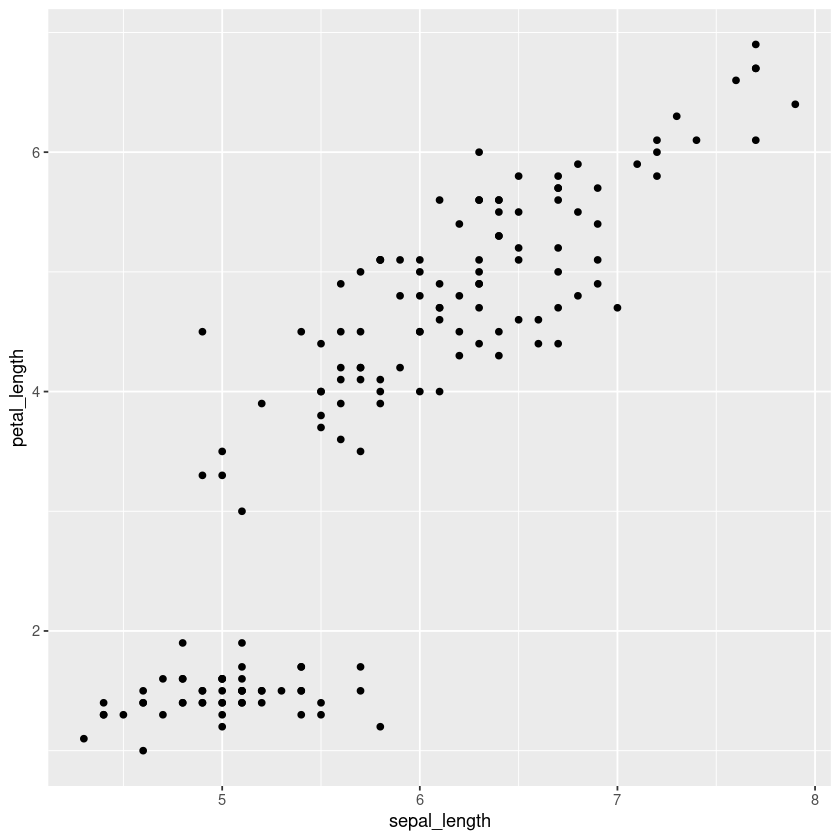

In [29]:
g <- iris.df %>% ggplot(aes(x=sepal_length, y=petal_length)) + geom_point()
g

And we can keep adding layers to incorporate more graphics to the plot:

`geom_smooth()` using formula = 'y ~ x'


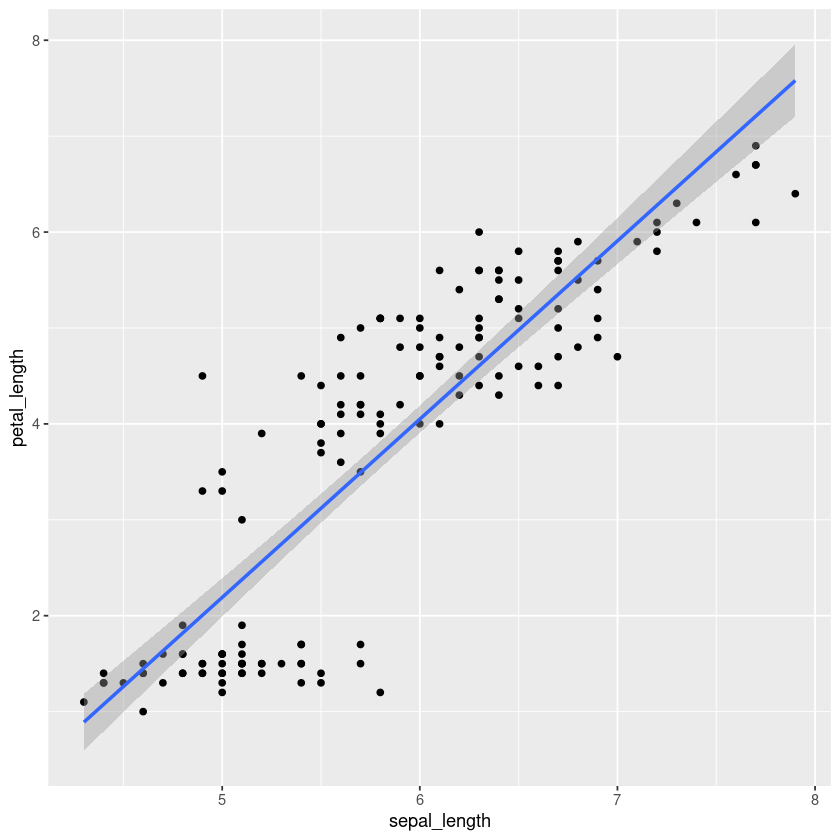

In [30]:
g + geom_smooth(method='lm')

The full list of available layers (`geom_` functions) can be found at https://ggplot2.tidyverse.org/reference.

And as we mentioned, we can also control the **aesthetics** of the plot through the `aes` function. Examples of this include:

- Position (i.e., on the x and y axes)
- Color (“outside” color)
- Fill (“inside” color)
- Shape (of points)
- Alpha (Transparency)
- Line type
- Size

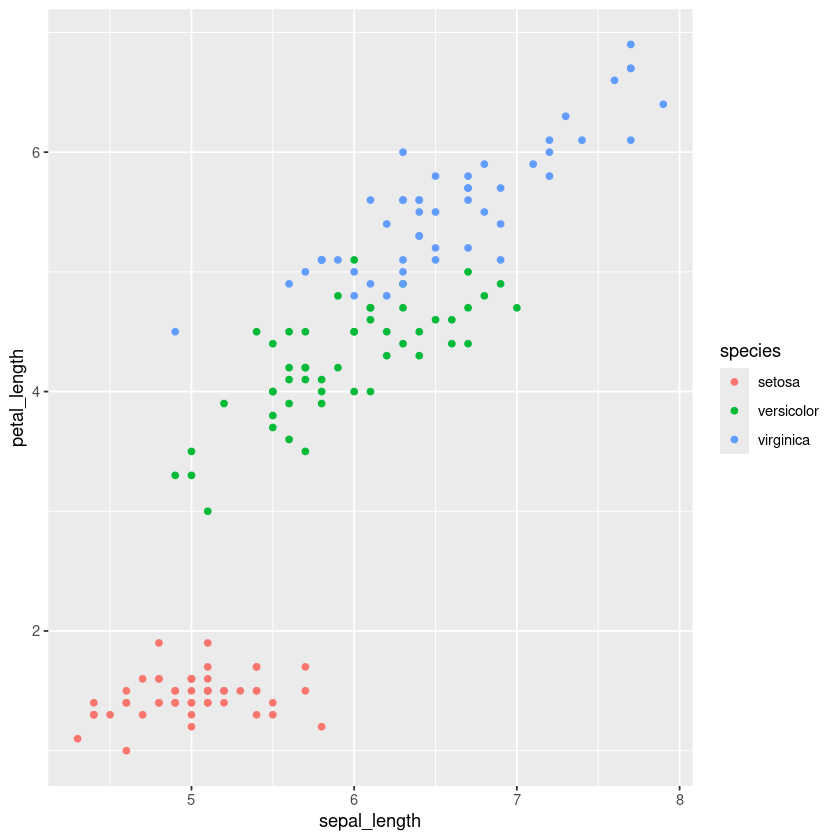

In [31]:
iris.df %>% ggplot(aes(x=sepal_length, y=petal_length, color=species)) + geom_point()

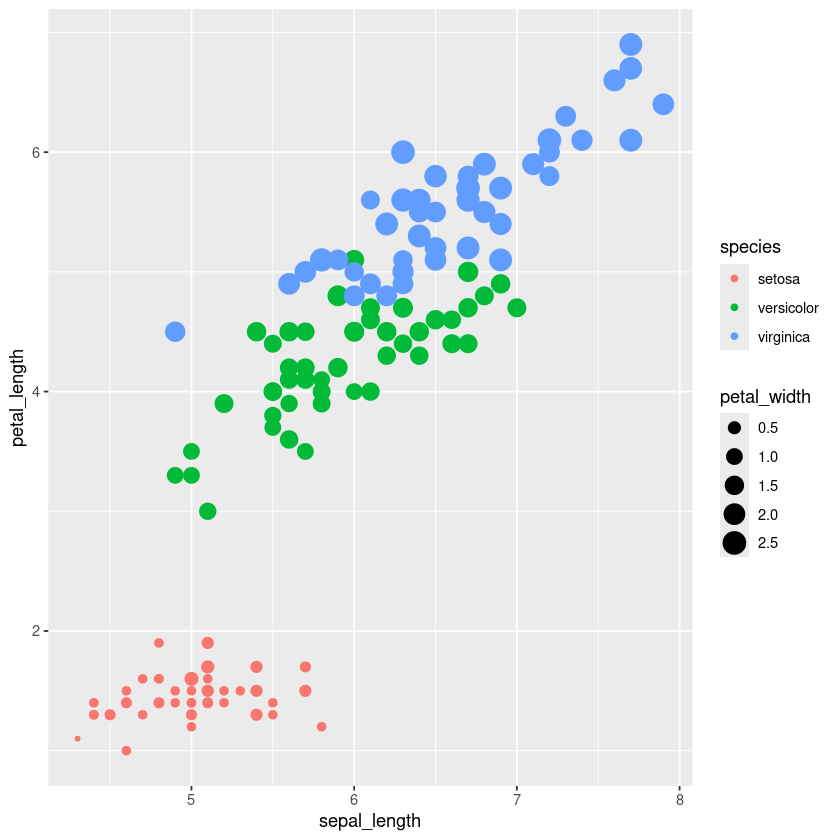

In [32]:
iris.df %>% ggplot(aes(x=sepal_length, y=petal_length, color=species, size=petal_width)) + geom_point()

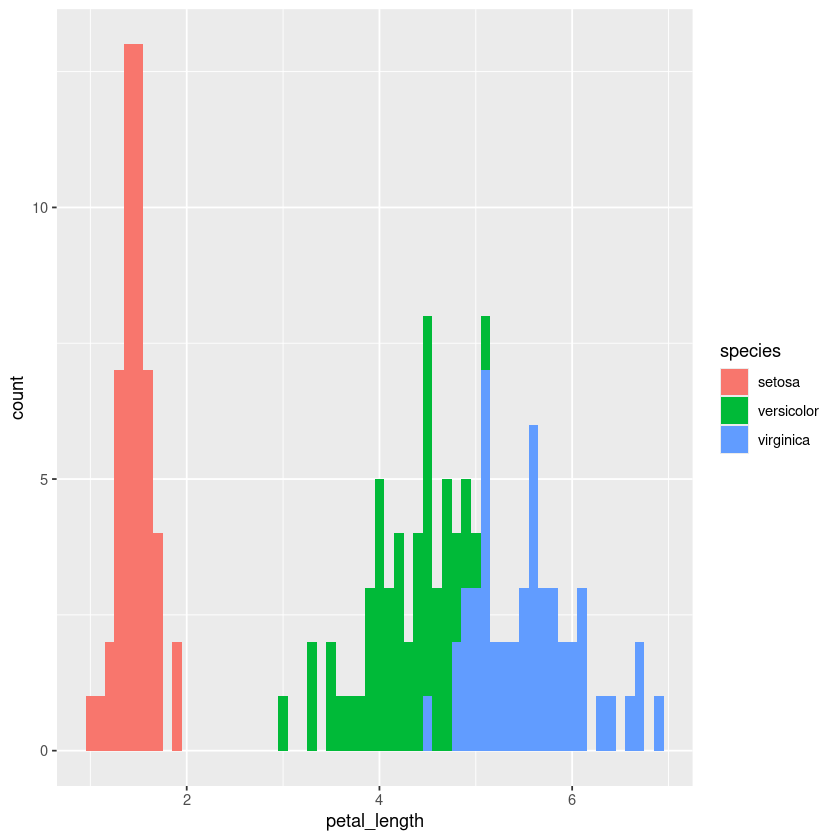

In [33]:
iris.df %>% ggplot(aes(x=petal_length, fill=species)) + geom_histogram(binwidth = 0.1)

I recommend visiting the [R graph gallery](https://r-graph-gallery.com/) for a complete list of recipes on creating graphs using **ggplot**. You'll have fun!

## Practice exercises

```{exercise}
:label: tidyverse1

1- Import the data from "https://vincentarelbundock.github.io/Rdatasets/csv/psych/sat.act.csv", which contains SAT and ACT scores for a sample of students. Save it to a variable named sat.dat.

2- Convert "education" and "gender" columns to factor type. (Hint: use `as.factor` function)

3- Using the pipe (`%>%`) operator, perform the following operations in sequence:

- Filter the data to include only observations where `age` is between 18 and 45 years.
- Create a new variable, `SAT.avg`, representing the average of `SATQ` and `SATV`.
- Select the columns `gender`, `education`, and `SAT.avg`.
- Group the dataframe by `gender` and `education`.
- Summarize the dataframe by computing the mean and standard deviation of `SAT.avg`. Here, since there are some missing information, you will need to remove these observations. You can actually do this when using the `mean` and `sd` functions. Look into their documentation to figure out how to do this.

Save the resulting dataframe in a variable named `sat.dat.preprocessed` and display it.

4- With the resulting dataframe, create a barplot using `geom_bar`:

- Set the x position to each level of `education`, and the `height` (y position) to the mean of `SAT.avg`.
- To display a separate bar for each `gender`, set `fill = gender` in the aesthetics, and use `position = "dodge"` to place the bars side by side rather than stacked.

Adjust the plot aesthetics to make it more visually appealing. You may find the following page useful for this: https://r-graph-gallery.com/4-barplot-with-error-bar.html
```

In [1]:
# Your answers from here